# Using .df() to create dataframes
When you make a request for data from the NWIS, you'll often want every parameter recorded at the site, plus all of the data quality flags. Later, however, when it comes time to graph your data, or to check the data quality, you'll only want a subset of your data, not the entire dataset.

The NWIS class has the ability to create a dataframe that only contains the data that you want. Simply use the .df() method with a few arguments to select only the information that you want.

In [1]:
import numpy as np
import pandas as pd
import hydrofunctions as hf
import re
print(hf.__version__)
%matplotlib inline

0.1.8dev


In [2]:
# Request all of the data from two sites.
test = hf.NWIS(['01589317', '01589330'], 'iv', period='P10D')

Requested data from https://waterservices.usgs.gov/nwis/iv/?format=json%2C1.1&sites=01589317%2C01589330&period=P10D


In [3]:
# Now that you have a dataset, list all of the sites, and all of the paramters collected at each site.
test

USGS:01589317: TRIBUTARY TO DEAD RUN TRIBUTARY AT WOODLAWN, MD
    00060: <5 * Minutes>  Discharge, cubic feet per second
    00065: <5 * Minutes>  Gage height, feet
USGS:01589330: DEAD RUN AT FRANKLINTOWN, MD
    00060: <5 * Minutes>  Discharge, cubic feet per second
    00065: <5 * Minutes>  Gage height, feet
Start: 2019-03-10 04:35:00+00:00
End:   2019-03-20 02:40:00+00:00

In [4]:
# Use the .df() method to create a dataframe that contains everything we requested.
# ...but we'll use .head() to only view the first five rows.
test.df().head()

,USGS:01589317:00060:00000_qualifiers,USGS:01589317:00060:00000,USGS:01589317:00065:00000_qualifiers,USGS:01589317:00065:00000,USGS:01589330:00060:00000_qualifiers,USGS:01589330:00060:00000,USGS:01589330:00065:00000_qualifiers,USGS:01589330:00065:00000
datetimeUTC,,,,,,,,
2019-03-10 04:35:00+00:00,P,0.54,P,0.56,P,4.42,P,0.60
2019-03-10 04:40:00+00:00,P,0.57,P,0.57,P,4.72,P,0.61
2019-03-10 04:45:00+00:00,P,0.68,P,0.59,P,4.72,P,0.61
2019-03-10 04:50:00+00:00,P,0.92,P,0.64,P,4.72,P,0.61
2019-03-10 04:55:00+00:00,P,1.97,P,0.77,P,4.72,P,0.61


In [5]:
# You can create a list of the column names too.
test.df().columns

Index(['USGS:01589317:00060:00000_qualifiers', 'USGS:01589317:00060:00000',
       'USGS:01589317:00065:00000_qualifiers', 'USGS:01589317:00065:00000',
       'USGS:01589330:00060:00000_qualifiers', 'USGS:01589330:00060:00000',
       'USGS:01589330:00065:00000_qualifiers', 'USGS:01589330:00065:00000'],
      dtype='object')

In [6]:
# Now, let's select only the columns for site #01589317.
# If we don't specify that we want the _qualifier flags, HF will assume you just want the data.
test.df('01589317').head()

,USGS:01589317:00060:00000,USGS:01589317:00065:00000
datetimeUTC,,
2019-03-10 04:35:00+00:00,0.54,0.56
2019-03-10 04:40:00+00:00,0.57,0.57
2019-03-10 04:45:00+00:00,0.68,0.59
2019-03-10 04:50:00+00:00,0.92,0.64
2019-03-10 04:55:00+00:00,1.97,0.77


In [7]:
# You can ask for the qualifier flags too, if you just want to do a quality control check.
# The flag 'P' means the data are provisional. The USGS may revise these data after conducting a site visit.
# A more complete listing of qualifier flags can be found here: https://waterdata.usgs.gov/usa/nwis/uv?codes_help#dv_cd1
test.df('01589330', 'flags').head()

,USGS:01589330:00060:00000_qualifiers,USGS:01589330:00065:00000_qualifiers
datetimeUTC,,
2019-03-10 04:35:00+00:00,P,P
2019-03-10 04:40:00+00:00,P,P
2019-03-10 04:45:00+00:00,P,P
2019-03-10 04:50:00+00:00,P,P
2019-03-10 04:55:00+00:00,P,P


In [8]:
# You can select the parameter you want using the parameter code ('00060' is discharge), 
# but some codes also have an alias to make things easier to remember.
test.df('discharge').head()  # 'q' is another alias for discharge; 'stage' is for '00065'

,USGS:01589317:00060:00000,USGS:01589330:00060:00000
datetimeUTC,,
2019-03-10 04:35:00+00:00,0.54,4.42
2019-03-10 04:40:00+00:00,0.57,4.72
2019-03-10 04:45:00+00:00,0.68,4.72
2019-03-10 04:50:00+00:00,0.92,4.72
2019-03-10 04:55:00+00:00,1.97,4.72


In [9]:
# The previous example selected discharge data at both sites in the dataset;
# you can combine your requests in any order to get just the columns you want.
# For example, the stage data at a single site would be:  .df('01589317', 'stage')
test.df('q', 'flags', '01589317').head()

,USGS:01589317:00060:00000_qualifiers
datetimeUTC,
2019-03-10 04:35:00+00:00,P
2019-03-10 04:40:00+00:00,P
2019-03-10 04:45:00+00:00,P
2019-03-10 04:50:00+00:00,P
2019-03-10 04:55:00+00:00,P


In [10]:
# Hydrofunctions will let you know if you request something you don't have.
test.df('01580000')

ValueError: The site 01580000 is not in this dataset.

C:\Users\Marty\Anaconda3\envs\py37hfdev\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


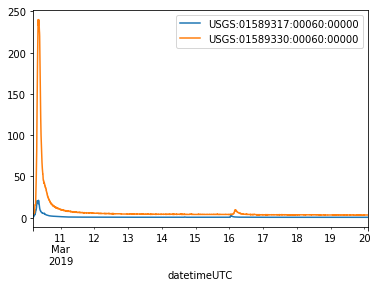

In [11]:
# Let's use our data for something interesting!
test.df('q').plot()

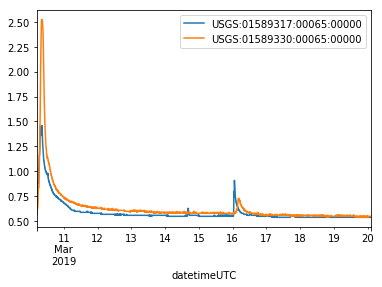

In [12]:
test.df('stage').plot()